<a href="https://colab.research.google.com/github/Sambhaji6529/Product_Assignment/blob/main/Product_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load ABC data
abc_path = "/content/drive/MyDrive/Major exported products for ABC.xlsx"
abc_data = pd.read_excel(abc_path, sheet_name=None)  # All sheets as dict

# Load XYZ data
xyz_path = "/content/drive/MyDrive/Export Data for Xyz.xlsx"
xyz_data = pd.read_excel(xyz_path, sheet_name=None)  # All sheets as dict

# View sheet names
abc_data.keys(), xyz_data.keys()


(dict_keys(['Tacrolius Ointment', 'Xylometazoline HCL Nasal drops', 'Thermoseal ultrasoft paste', 'Triclosan Facewash', 'Sodium chl Nasal drops', 'Vaginal foam wash', 'Mometasone furate cream', 'Luliconazole  cream', 'lidocaine spary', 'Ketoconazole cream', 'Fluticason Propionate Nasal Spr', 'Fluoride toothpaste', 'EDTA Solutions', 'Clobetasol Propionate  Cream', 'Betamethasone cream', 'Benzoyl Peroxide  Gel', 'Beclomethasone Dipropionate', 'Collagen Sponge', 'Azelastine', 'Acyclovir', 'Clotrimazole Cream', 'Terbinafine cream']),
 dict_keys(['Worksheet']))

In [3]:
# Preview one sheet (if multiple years are in sheets)
abc_df = pd.concat(abc_data.values(), ignore_index=True)
abc_df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Date,HS Code,Port of discharge,Description,Supplier,Buyer,Country,Quantity,Unit,Item rate,Currency
1,2024-12-31 00:00:00,30049099,BOMBAY,TACROLIUS 1MG CAPSULE[200 NOS X 10 = 2000 TAB]...,M T MADON EXPORTS,MORAN PHARMACY LTD,ABC,200,Nos,0.479,USD
2,2024-12-27 00:00:00,30049069,BOMBAY,Harmless medicine for human consumption: TACLI...,SUBHRA PHARMA PRIAVATE LIMITED,TO THE ORDER OF,ABC,60,Nos,1.899,USD
3,2024-12-12 00:00:00,30049099,AHEMDABAD,IO-LIMUS EYE OINTMENT 5GMTACROLIMUS OINTMENT 0...,COSMOS HEALTHCARE,TO THE ORDER OF BUYER,ABC,500,Nos,1,USD
4,2024-12-10 00:00:00,30049099,BOMBAY,TACROHEAL 2 MG-TACROLIMUS 2 MG,MDS ENTERPRISES,TO THE BUYER OF TO THE MANAGER..,ABC,30,Nos,9.002,USD


In [14]:
# Step 3.1: Combine all sheets
abc_df = pd.concat(abc_data.values(), ignore_index=True)

# Step 3.2: Set the first row as column headers
abc_df.columns = abc_df.iloc[0]  # Set first row as header
abc_df = abc_df[1:]  # Drop the first row from data

# Step 3.3: Rename relevant columns for simplicity
abc_df.rename(columns={
    'Date': 'Date',
    'HS Code': 'HS_Code',
    'Port of discharge': 'Port',
    'Description': 'Product',
    'Country': 'Country',
    'Quantity': 'Quantity',
    'Unit': 'Unit',
    'Item rate': 'Rate',
    'Currency': 'Currency'
}, inplace=True)

# Step 3.4: Drop any columns not needed for analysis
abc_df = abc_df[['Date', 'Product', 'Quantity', 'Rate', 'Currency', 'Country']]

# Step 3.5: Convert 'Date' to datetime and create 'Year'
abc_df['Date'] = pd.to_datetime(abc_df['Date'], errors='coerce')
abc_df['Year'] = abc_df['Date'].dt.year

# Step 3.6: Convert Quantity and Rate to numeric
abc_df['Quantity'] = pd.to_numeric(abc_df['Quantity'], errors='coerce')
abc_df['Rate'] = pd.to_numeric(abc_df['Rate'], errors='coerce')

# Step 3.7: Drop rows with missing key info
abc_df.dropna(subset=['Year', 'Product', 'Quantity', 'Rate'], inplace=True)

# Step 3.8: Preview cleaned data
abc_df.head()



,Date,Product,Quantity,Rate,Currency,Country,Year
1,2024-12-31,TACROLIUS 1MG CAPSULE[200 NOS X 10 = 2000 TAB]...,200.0,0.479,USD,ABC,2024.0
2,2024-12-27,Harmless medicine for human consumption: TACLI...,60.0,1.899,USD,ABC,2024.0
3,2024-12-12,IO-LIMUS EYE OINTMENT 5GMTACROLIMUS OINTMENT 0...,500.0,1.000,USD,ABC,2024.0
4,2024-12-10,TACROHEAL 2 MG-TACROLIMUS 2 MG,30.0,9.002,USD,ABC,2024.0
5,2024-11-30,HARMLESS MEDICINE FOR HUMAN CONSUMPTIONTACROLI...,60.0,2.600,USD,ABC,2024.0


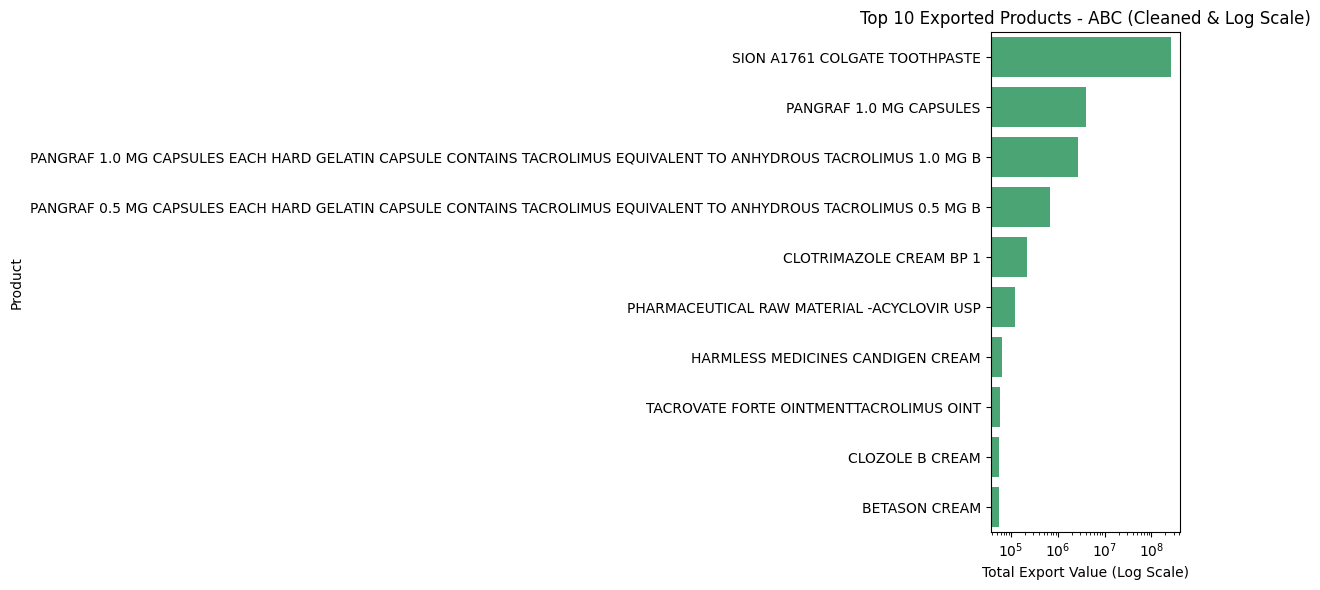

Top 10 Exported Products (Cleaned):
                                         Clean_Product  Export_Value
228                      SION A1761 COLGATE TOOTHPASTE  2.688724e+08
187                            PANGRAF 1.0 MG CAPSULES  4.106259e+06
188  PANGRAF 1.0 MG CAPSULES EACH HARD GELATIN CAPS...  2.745191e+06
186  PANGRAF 0.5 MG CAPSULES EACH HARD GELATIN CAPS...  6.972000e+05
58                             CLOTRIMAZOLE CREAM BP 1  2.223369e+05
205         PHARMACEUTICAL RAW MATERIAL -ACYCLOVIR USP  1.202368e+05
109                  HARMLESS MEDICINES CANDIGEN CREAM  6.282320e+04
256            TACROVATE FORTE OINTMENTTACROLIMUS OINT  5.750000e+04
66                                     CLOZOLE B CREAM  5.600400e+04
42                                       BETASON CREAM  5.578300e+04


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make a clean copy
abc_cleaned_df = abc_df.copy()

# Convert to numeric, coercing errors
abc_cleaned_df['Quantity'] = pd.to_numeric(abc_cleaned_df['Quantity'], errors='coerce')
abc_cleaned_df['Rate'] = pd.to_numeric(abc_cleaned_df['Rate'], errors='coerce')

# Drop rows with missing or zero quantity/rate
abc_cleaned_df = abc_cleaned_df.dropna(subset=['Quantity', 'Rate'])
abc_cleaned_df = abc_cleaned_df[(abc_cleaned_df['Quantity'] > 0) & (abc_cleaned_df['Rate'] > 0)]

# Use .loc for assignment to avoid SettingWithCopyWarning
abc_cleaned_df.loc[:, 'Clean_Product'] = abc_cleaned_df['Product'].str.upper()
abc_cleaned_df.loc[:, 'Clean_Product'] = abc_cleaned_df['Clean_Product'].str.extract(r'([A-Z0-9\s\-\.]+)')[0]
abc_cleaned_df.loc[:, 'Clean_Product'] = abc_cleaned_df['Clean_Product'].str.strip()

# Calculate export value safely
abc_cleaned_df.loc[:, 'Export_Value'] = abc_cleaned_df['Quantity'] * abc_cleaned_df['Rate']

# Group by cleaned product names
top_10_abc = abc_cleaned_df.groupby('Clean_Product')['Export_Value'].sum().reset_index()

# Sort and get top 10
top_10_abc = top_10_abc.sort_values(by='Export_Value', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_abc, x='Export_Value', y='Clean_Product', color='mediumseagreen')  # simpler without palette warning
plt.xscale("log")
plt.title('Top 10 Exported Products - ABC (Cleaned & Log Scale)')
plt.xlabel('Total Export Value (Log Scale)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

# Output table
print("Top 10 Exported Products (Cleaned):")
print(top_10_abc)


     Year                                      Clean_Product  Export_Value
0  2018.0                                ACIVIR EYE OINTMENT         30.00
1  2018.0                               ACYCLOSAFE INJECTION       9250.00
2  2018.0                                        ACYCLOVIR 3        211.68
3  2018.0                            ACYCLOVIR USP BATCH NO.      35100.00
4  2018.0  AEROCORT INHALER 200D. EACH ACTUATION DE LIVER...       3900.00


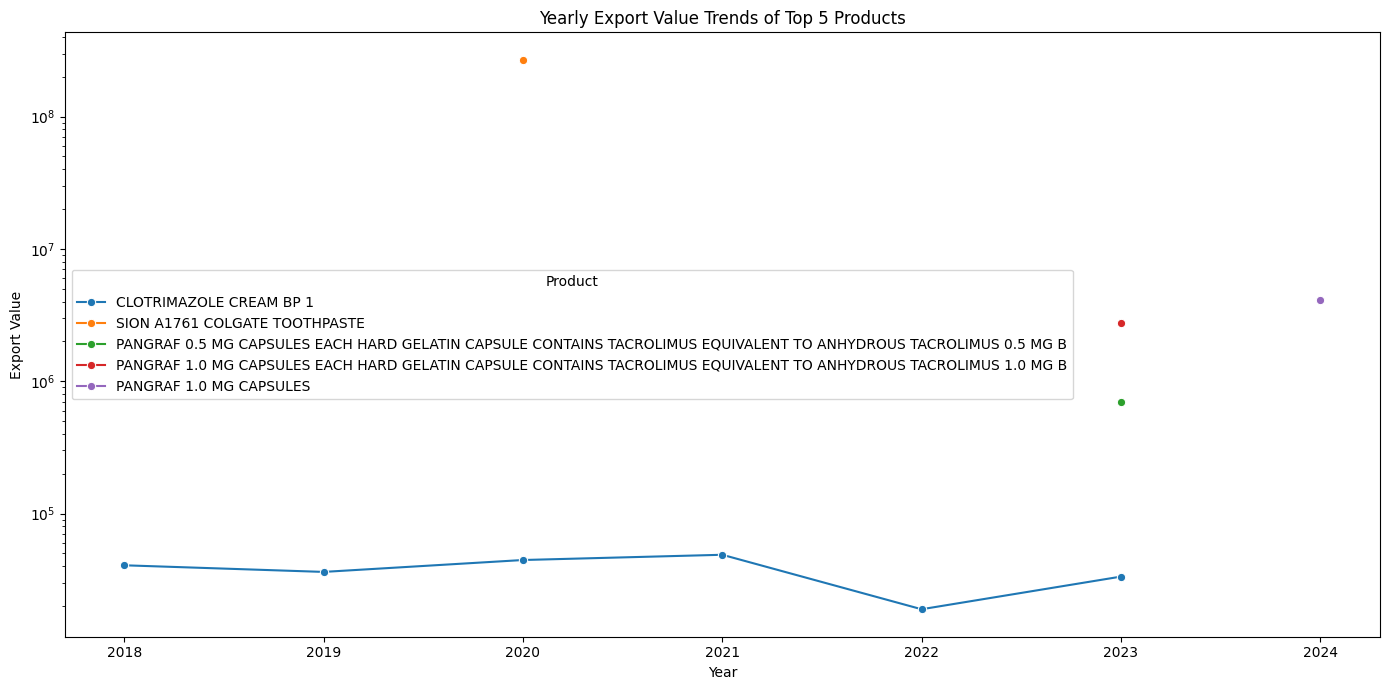

In [26]:
# Step 5: Analyze Product-wise Exports by Year

# 5.1 Group by Year and Clean_Product, summing Export_Value
product_yearly_export = abc_cleaned_df.groupby(['Year', 'Clean_Product'])['Export_Value'].sum().reset_index()

# 5.2 Preview the result
print(product_yearly_export.head())

# Optional: Plot a sample to visualize trends for top products
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization, let's pick top 5 products by total export value
top_products = (product_yearly_export.groupby('Clean_Product')['Export_Value']
                .sum()
                .sort_values(ascending=False)
                .head(5)
                .index)

# Filter the yearly export for these top products
top_product_yearly_export = product_yearly_export[product_yearly_export['Clean_Product'].isin(top_products)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=top_product_yearly_export, x='Year', y='Export_Value', hue='Clean_Product', marker='o')
plt.title('Yearly Export Value Trends of Top 5 Products')
plt.ylabel('Export Value')
plt.xlabel('Year')
plt.yscale('log')  # Optional: log scale if values vary widely
plt.legend(title='Product')
plt.tight_layout()
plt.show()


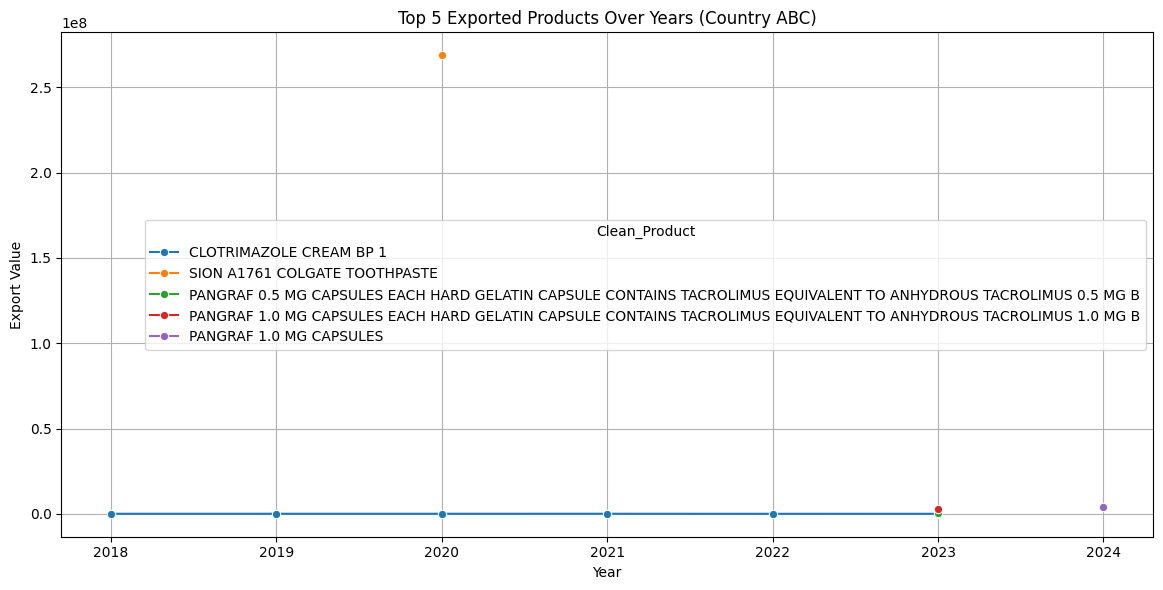

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 6: Visualize Top Products Over Time

# 6.1: Find top 5 products overall by total export value (using cleaned product names)
top_products = (
    abc_cleaned_df.groupby('Clean_Product')['Export_Value'].sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# 6.2: Filter yearly export data for only the top products
top_data = product_yearly_export[product_yearly_export['Clean_Product'].isin(top_products)]

# 6.3: Plot the trends over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_data, x='Year', y='Export_Value', hue='Clean_Product', marker='o')
plt.title('Top 5 Exported Products Over Years (Country ABC)')
plt.ylabel('Export Value')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()
